BloomBerg Data Analysis

Data Visualization using Bloomberg data.

1) plot histogram & density of the market cap (CUR_MKT_CAP) & share prices (PX_last).

2) Classify the histogram & density based on small, mid & large cap (Variable:COM_Classification).

3) Box plot to understand the statistics of outstanding shares in each category small, mid & large cap (Variable:COM_Classification)

4) Scatter plot to understand correlation between share price Vs Market cap

5) Also classify this based on small, mid & large cap (Variable:COM_Classification).

6) Bar chart (Stack or dodge) to find out number of companies in small, mid & large cap.


In [2]:
#importing important dependencies and packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [4]:
#reading data from file
data=pd.read_excel("/content/BloombergData.xlsx")

In [5]:
#printing raw data
data[:20]

,TICKER,NAME,INDUSTRY_SECTOR,INDUSTRY_GROUP,CUR_MKT_CAP,PX_LAST,NAME_OF_CEO,CEO_START_DATE,TOT_CEO_COMP,COMPANY_TEL_NUMBER,COMPANY_WEB_ADDRESS
0,A UN EQUITY,AGILENT TECHNOLOGIES INC,Industrial,Electronics,2.243792e+10,69.60,"Michael R Mcmullen ""Mike""",3/18/2015,1.009066e+07,1-408-345-8886,www.agilent.com
1,AAL UW EQUITY,AMERICAN AIRLINES GROUP INC,"Consumer, Cyclical",Airlines,2.619296e+10,55.37,"William Douglas Parker ""Doug""",2014-01-01 00:00:00,1.114076e+07,1-817-963-1234,www.aa.com
2,AAP UN EQUITY,ADVANCE AUTO PARTS INC,"Consumer, Cyclical",Retail,8.462357e+09,114.39,"Thomas R Greco ""Tom""",4/11/2016,2.447994e+07,1-540-362-4911,www.advanceautoparts.com
3,AAPL UW EQUITY,APPLE INC,Technology,Computers,8.925696e+11,175.88,"Timothy Donald Cook ""Tim""",1/1/2011,1.282507e+07,1-408-996-1010,www.apple.com
4,ABBV UN EQUITY,ABBVIE INC,"Consumer, Non-cyclical",Pharmaceuticals,1.794702e+11,113.12,Richard Gonzalez,1/1/2013,2.262524e+07,1-847-932-7900,www.abbvie.com.co
5,ABC UN EQUITY,AMERISOURCEBERGEN CORP,"Consumer, Non-cyclical",Pharmaceuticals,1.951760e+10,88.75,"Steven H Collis ""Steve""",7/1/2011,9.907274e+06,1-610-727-7000,www.amerisourcebergen.com
6,ABT UN EQUITY,ABBOTT LABORATORIES,"Consumer, Non-cyclical",Healthcare-Products,1.089712e+11,62.40,Miles D White,1/1/1999,1.897102e+07,1-847-937-6100,www.abbott.com
7,ACN UN EQUITY,ACCENTURE PLC-CL A,Technology,Computers,1.042840e+11,162.00,Pierre Nanterme,1/1/2011,1.980411e+07,353-1-646-2000,www.accenture.com
8,ADBE UW EQUITY,ADOBE SYSTEMS INC,Technology,Software,1.136196e+11,230.48,Shantanu Narayen,12/1/2007,2.193403e+07,1-408-536-6000,www.adobe.com
9,ADI UW EQUITY,ANALOG DEVICES INC,Technology,Semiconductors,3.436215e+10,92.88,Vincent T Roche,3/28/2013,1.051176e+07,1-781-329-4700,www.analog.com


In [6]:
#checking if the raw data contains any null value
data.isnull().any()

TICKER                 False
NAME                   False
INDUSTRY_SECTOR        False
INDUSTRY_GROUP         False
CUR_MKT_CAP            False
PX_LAST                False
NAME_OF_CEO            False
CEO_START_DATE         False
TOT_CEO_COMP           False
COMPANY_TEL_NUMBER     False
COMPANY_WEB_ADDRESS    False
dtype: bool

In [7]:
#getting some information or idea about the data we have
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TICKER               505 non-null    object 
 1   NAME                 505 non-null    object 
 2   INDUSTRY_SECTOR      505 non-null    object 
 3   INDUSTRY_GROUP       505 non-null    object 
 4   CUR_MKT_CAP          505 non-null    float64
 5   PX_LAST              505 non-null    float64
 6   NAME_OF_CEO          505 non-null    object 
 7   CEO_START_DATE       505 non-null    object 
 8   TOT_CEO_COMP         505 non-null    float64
 9   COMPANY_TEL_NUMBER   505 non-null    object 
 10  COMPANY_WEB_ADDRESS  505 non-null    object 
dtypes: float64(3), object(8)
memory usage: 43.5+ KB


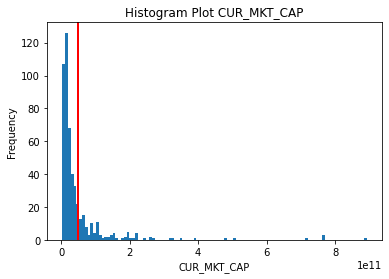

mean of the data is:  50457860321.02928


In [8]:
#plotting distribution
plt.hist(data['CUR_MKT_CAP'],bins = 'auto')
# Add axis labels
plt.xlabel("CUR_MKT_CAP")
plt.ylabel("Frequency")
plt.title("Histogram Plot CUR_MKT_CAP")
#plotting mean value as red line
plt.axvline(x=data['CUR_MKT_CAP'].mean(), linewidth=2, color = 'r') 
plt.show()
#printing mean value for quality attribute
print("mean of the data is: ",data['CUR_MKT_CAP'].mean())

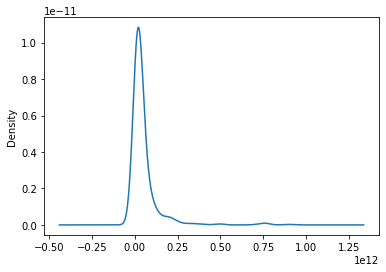

In [9]:
#Density plot for data['CUR_MKT_CAP'] 
ax = data['CUR_MKT_CAP'].plot.kde()

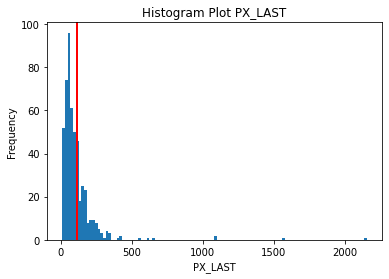

mean of the data is:  110.9775287128713


In [10]:
#plotting distribution
plt.hist(data['PX_LAST'],bins = 'auto')
# Add axis labels
plt.xlabel("PX_LAST")
plt.ylabel("Frequency")
plt.title("Histogram Plot PX_LAST")
#plotting mean value as red line
plt.axvline(x=data['PX_LAST'].mean(), linewidth=2, color = 'r') 
plt.show()
#printing mean value for quality attribute
print("mean of the data is: ",data['PX_LAST'].mean())

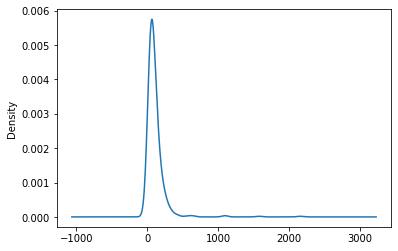

In [11]:
#Density plot for data['CUR_MKT_CAP'] 
densityB = data['PX_LAST'].plot.kde()

In [12]:
#printing total count of the data
n_count = data.shape[0]
n_count

505

In [18]:
# Number of wines with large cap(> Rs.20,000 Cr)
large_cap = data.loc[(data['CUR_MKT_CAP'] > 200000000000)]
large_cap_n = large_cap.shape[0]
print(large_cap_n)
large_cap[:20]

21


,TICKER,NAME,INDUSTRY_SECTOR,INDUSTRY_GROUP,CUR_MKT_CAP,PX_LAST,NAME_OF_CEO,CEO_START_DATE,TOT_CEO_COMP,COMPANY_TEL_NUMBER,COMPANY_WEB_ADDRESS
3,AAPL UW EQUITY,APPLE INC,Technology,Computers,8.925696e+11,175.88,"Timothy Donald Cook ""Tim""",1/1/2011,1.282507e+07,1-408-996-1010,www.apple.com
38,AMZN UW EQUITY,AMAZON.COM INC,Communications,Internet,7.636307e+11,1578.00,"Jeffrey P Bezos ""Jeff""",5/1/1996,1.681840e+06,1-206-266-1000,www.amazon.com/
60,BAC UN EQUITY,BANK OF AMERICA CORP,Financial,Banks,3.281911e+11,32.09,Brian T Moynihan,1/1/2010,2.177983e+07,1-704-386-5681,www.bankofamerica.com
75,BRK/B UN EQUITY,BERKSHIRE HATHAWAY INC-CL B,Financial,Insurance,5.035841e+11,204.08,Warren E Buffett,1/1/1970,1.000000e+05,1-402-346-1400,www.berkshirehathaway.com
119,CSCO UW EQUITY,CISCO SYSTEMS INC,Communications,Telecommunications,2.133919e+11,44.28,"Charles H Robbins ""Chuck""",7/26/2015,1.674711e+07,1-408-526-4000,www.cisco.com
127,CVX UN EQUITY,CHEVRON CORP,Energy,Oil&Gas,2.190678e+11,114.69,"Michael K Wirth ""Mike""",2/1/2018,2.465749e+07,1-925-842-1000,www.chevron.com
180,FB UW EQUITY,FACEBOOK INC-A,Communications,Internet,4.820865e+11,164.39,Mark Elliot Zuckerberg,2/4/2004,5.765832e+06,1-650-618-7714,www.facebook.com
206,GOOG UW EQUITY,ALPHABET INC-CL C,Communications,Internet,7.622306e+11,1096.42,"Lawrence E Page ""Larry""",10/2/2015,1.524899e+07,1-650-253-0000,www.abc.xyz
207,GOOGL UW EQUITY,ALPHABET INC-CL A,Communications,Internet,7.622509e+11,1095.67,"Lawrence E Page ""Larry""",10/2/2015,1.510388e+07,1-650-253-0000,www.abc.xyz
221,HD UN EQUITY,HOME DEPOT INC,"Consumer, Cyclical",Retail,2.073922e+11,177.60,Craig A Menear,11/1/2014,1.147160e+07,1-770-433-8211,www.homedepot.com


In [19]:
# Number of wines with mid cap(>= Rs.5000 Cr and <= Rs.20,000 Cr)
mid_cap = data.loc[(data['CUR_MKT_CAP'] <= 200000000000) & (data['CUR_MKT_CAP'] >= 50000000000)]
mid_cap_n = mid_cap.shape[0]
print(mid_cap_n)
mid_cap[:20]

96


,TICKER,NAME,INDUSTRY_SECTOR,INDUSTRY_GROUP,CUR_MKT_CAP,PX_LAST,NAME_OF_CEO,CEO_START_DATE,TOT_CEO_COMP,COMPANY_TEL_NUMBER,COMPANY_WEB_ADDRESS
4,ABBV UN EQUITY,ABBVIE INC,"Consumer, Non-cyclical",Pharmaceuticals,1.794702e+11,113.12,Richard Gonzalez,1/1/2013,22625243.0,1-847-932-7900,www.abbvie.com.co
6,ABT UN EQUITY,ABBOTT LABORATORIES,"Consumer, Non-cyclical",Healthcare-Products,1.089712e+11,62.40,Miles D White,1/1/1999,18971019.0,1-847-937-6100,www.abbott.com
7,ACN UN EQUITY,ACCENTURE PLC-CL A,Technology,Computers,1.042840e+11,162.00,Pierre Nanterme,1/1/2011,19804109.0,353-1-646-2000,www.accenture.com
8,ADBE UW EQUITY,ADOBE SYSTEMS INC,Technology,Software,1.136196e+11,230.48,Shantanu Narayen,12/1/2007,21934033.0,1-408-536-6000,www.adobe.com
11,ADP UW EQUITY,AUTOMATIC DATA PROCESSING,"Consumer, Non-cyclical",Commercial Services,5.119765e+10,115.54,Carlos A Rodriguez,11/9/2011,9764300.0,1-973-974-5000,www.adp.com
17,AET UN EQUITY,AETNA INC,"Consumer, Non-cyclical",Healthcare-Services,5.617526e+10,171.79,Mark T Bertolini,11/29/2010,18662306.0,1-860-273-0123,www.aetna.com
19,AGN UN EQUITY,ALLERGAN PLC,"Consumer, Non-cyclical",Pharmaceuticals,5.380616e+10,164.38,"Brenton L Saunders ""Brent""",2014-01-01 00:00:00,4139028.0,1-862-261-7000,www.allergan.com
20,AIG UN EQUITY,AMERICAN INTERNATIONAL GROUP,Financial,Insurance,5.002385e+10,55.43,Peter Zaffino,8/1/2017,9576535.0,1-212-770-7000,www.aig.com
31,AMAT UW EQUITY,APPLIED MATERIALS INC,Technology,Semiconductors,6.213766e+10,59.22,Gary E Dickerson,9/1/2013,15322705.0,1-408-727-5555,www.appliedmaterials.com
35,AMGN UW EQUITY,AMGEN INC,"Consumer, Non-cyclical",Biotechnology,1.316179e+11,182.69,Robert A Bradway,5/23/2012,16850001.0,1-805-447-1000,www.amgen.com


In [20]:
# Number of wines with small cap(< Rs.5,000 Cr)
small_cap = data.loc[(data['CUR_MKT_CAP'] < 50000000000)]
small_cap_n = small_cap.shape[0]
print(small_cap_n)
small_cap[:20]

388


,TICKER,NAME,INDUSTRY_SECTOR,INDUSTRY_GROUP,CUR_MKT_CAP,PX_LAST,NAME_OF_CEO,CEO_START_DATE,TOT_CEO_COMP,COMPANY_TEL_NUMBER,COMPANY_WEB_ADDRESS
0,A UN EQUITY,AGILENT TECHNOLOGIES INC,Industrial,Electronics,2.243792e+10,69.60,"Michael R Mcmullen ""Mike""",3/18/2015,1.009066e+07,1-408-345-8886,www.agilent.com
1,AAL UW EQUITY,AMERICAN AIRLINES GROUP INC,"Consumer, Cyclical",Airlines,2.619296e+10,55.37,"William Douglas Parker ""Doug""",2014-01-01 00:00:00,1.114076e+07,1-817-963-1234,www.aa.com
2,AAP UN EQUITY,ADVANCE AUTO PARTS INC,"Consumer, Cyclical",Retail,8.462357e+09,114.39,"Thomas R Greco ""Tom""",4/11/2016,2.447994e+07,1-540-362-4911,www.advanceautoparts.com
5,ABC UN EQUITY,AMERISOURCEBERGEN CORP,"Consumer, Non-cyclical",Pharmaceuticals,1.951760e+10,88.75,"Steven H Collis ""Steve""",7/1/2011,9.907274e+06,1-610-727-7000,www.amerisourcebergen.com
9,ADI UW EQUITY,ANALOG DEVICES INC,Technology,Semiconductors,3.436215e+10,92.88,Vincent T Roche,3/28/2013,1.051176e+07,1-781-329-4700,www.analog.com
10,ADM UN EQUITY,ARCHER-DANIELS-MIDLAND CO,"Consumer, Non-cyclical",Agriculture,2.385126e+10,42.67,Juan Ricardo Luciano,1/1/2015,1.401262e+07,1-312-634-8100,www.adm.com
12,ADS UN EQUITY,ALLIANCE DATA SYSTEMS CORP,Financial,Diversified Finan Serv,1.263132e+10,227.86,"Edward J Heffernan ""Ed""",3/1/2009,7.840417e+06,1-214-494-3000,www.alliancedata.com
13,ADSK UW EQUITY,AUTODESK INC,Technology,Software,2.985276e+10,135.53,Andrew Anagnost,2/8/2017,1.072378e+07,1-415-507-5000,www.autodesk.com
14,AEE UN EQUITY,AMEREN CORPORATION,Utilities,Electric,1.338859e+10,55.21,Warner L Baxter,7/1/2014,1.063673e+07,1-314-621-3222,www.ameren.com
15,AEP UN EQUITY,AMERICAN ELECTRIC POWER,Utilities,Electric,3.318062e+10,67.40,"Nicholas K Akins ""Nick""",11/12/2011,1.153046e+07,1-614-716-1000,www.aep.com


In [21]:
# Print the results
print("Total number of records: {}".format(n_count))
print("Number of small cap records: {}".format(small_cap_n))
print("Number of Mid Cap records: {}".format(mid_cap_n))
print("Number of Large cap records: {}".format(large_cap_n))

Total number of records: 505
Number of small cap records: 388
Number of Mid Cap records: 96
Number of Large cap records: 21


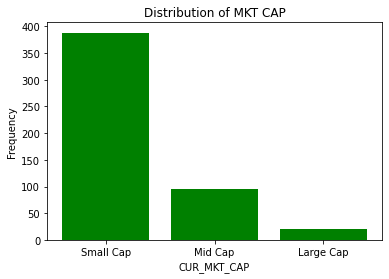

In [53]:
#plotting different classes
record_dict = {"Small Cap":small_cap_n,'Mid Cap':mid_cap_n,'Large Cap':large_cap_n}
# Add axis labels
plt.xlabel("CUR_MKT_CAP")
plt.ylabel("Frequency")
plt.title("Distribution of MKT CAP")
plt.bar(record_dict.keys(), record_dict.values(), color='g')
plt.show()

In [36]:
small_cap['COM_Classification'] = '1'
small_cap

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TICKER,NAME,INDUSTRY_SECTOR,INDUSTRY_GROUP,CUR_MKT_CAP,PX_LAST,NAME_OF_CEO,CEO_START_DATE,TOT_CEO_COMP,COMPANY_TEL_NUMBER,COMPANY_WEB_ADDRESS,COM_Classification
0,A UN EQUITY,AGILENT TECHNOLOGIES INC,Industrial,Electronics,2.243792e+10,69.60,"Michael R Mcmullen ""Mike""",3/18/2015,10090661.0,1-408-345-8886,www.agilent.com,1
1,AAL UW EQUITY,AMERICAN AIRLINES GROUP INC,"Consumer, Cyclical",Airlines,2.619296e+10,55.37,"William Douglas Parker ""Doug""",2014-01-01 00:00:00,11140763.0,1-817-963-1234,www.aa.com,1
2,AAP UN EQUITY,ADVANCE AUTO PARTS INC,"Consumer, Cyclical",Retail,8.462357e+09,114.39,"Thomas R Greco ""Tom""",4/11/2016,24479941.0,1-540-362-4911,www.advanceautoparts.com,1
5,ABC UN EQUITY,AMERISOURCEBERGEN CORP,"Consumer, Non-cyclical",Pharmaceuticals,1.951760e+10,88.75,"Steven H Collis ""Steve""",7/1/2011,9907274.0,1-610-727-7000,www.amerisourcebergen.com,1
9,ADI UW EQUITY,ANALOG DEVICES INC,Technology,Semiconductors,3.436215e+10,92.88,Vincent T Roche,3/28/2013,10511761.0,1-781-329-4700,www.analog.com,1
...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL UN EQUITY,XYLEM INC,Industrial,Machinery-Diversified,1.420975e+10,78.99,Patrick K Decker,3/17/2014,7382065.0,1-914-323-5700,www.xylem.com,1
501,YUM UN EQUITY,YUM! BRANDS INC,"Consumer, Cyclical",Retail,2.770832e+10,83.38,Greg Creed,1/1/2015,15380682.0,1-502-874-8300,www.yum.com,1
502,ZBH UN EQUITY,ZIMMER BIOMET HOLDINGS INC,"Consumer, Non-cyclical",Healthcare-Products,2.324001e+10,114.40,Bryan C Hanson,12/19/2017,11492363.0,1-574-267-6131,www.zimmerbiomet.com,1
503,ZION UW EQUITY,ZIONS BANCORPORATION,Financial,Banks,1.076898e+10,54.80,Harris H Simmons,2014-01-01 00:00:00,2807004.0,1-801-844-7637,www.zionsbancorporation.com,1


In [37]:
mid_cap['COM_Classification'] = 2
mid_cap

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TICKER,NAME,INDUSTRY_SECTOR,INDUSTRY_GROUP,CUR_MKT_CAP,PX_LAST,NAME_OF_CEO,CEO_START_DATE,TOT_CEO_COMP,COMPANY_TEL_NUMBER,COMPANY_WEB_ADDRESS,COM_Classification
4,ABBV UN EQUITY,ABBVIE INC,"Consumer, Non-cyclical",Pharmaceuticals,1.794702e+11,113.120,Richard Gonzalez,1/1/2013,22625243.0,1-847-932-7900,www.abbvie.com.co,2
6,ABT UN EQUITY,ABBOTT LABORATORIES,"Consumer, Non-cyclical",Healthcare-Products,1.089712e+11,62.400,Miles D White,1/1/1999,18971019.0,1-847-937-6100,www.abbott.com,2
7,ACN UN EQUITY,ACCENTURE PLC-CL A,Technology,Computers,1.042840e+11,162.000,Pierre Nanterme,1/1/2011,19804109.0,353-1-646-2000,www.accenture.com,2
8,ADBE UW EQUITY,ADOBE SYSTEMS INC,Technology,Software,1.136196e+11,230.480,Shantanu Narayen,12/1/2007,21934033.0,1-408-536-6000,www.adobe.com,2
11,ADP UW EQUITY,AUTOMATIC DATA PROCESSING,"Consumer, Non-cyclical",Commercial Services,5.119765e+10,115.540,Carlos A Rodriguez,11/9/2011,9764300.0,1-973-974-5000,www.adp.com,2
...,...,...,...,...,...,...,...,...,...,...,...,...
461,UPS UN EQUITY,UNITED PARCEL SERVICE-CL B,Industrial,Transportation,9.302466e+10,107.910,David P Abney,9/1/2014,14608732.0,1-404-828-6000,www.ups.com,2
463,USB UN EQUITY,US BANCORP,Financial,Banks,8.704831e+10,52.710,"Andrew Cecere ""Andy""",4/18/2017,27411961.0,1-651-466-3000,www.usbank.com,2
464,UTX UN EQUITY,UNITED TECHNOLOGIES CORP,Industrial,Aerospace/Defense,1.017790e+11,127.320,"Gregory J Hayes ""Greg""",11/24/2014,17027493.0,1-860-728-7000,www.utc.com,2
476,VZ UN EQUITY,VERIZON COMMUNICATIONS INC,Communications,Telecommunications,1.965757e+11,47.655,Lowell C Mcadam,8/1/2011,17937581.0,1-212-395-1000,www.verizon.com,2


In [39]:
large_cap['COM_Classification'] = 3
large_cap

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TICKER,NAME,INDUSTRY_SECTOR,INDUSTRY_GROUP,CUR_MKT_CAP,PX_LAST,NAME_OF_CEO,CEO_START_DATE,TOT_CEO_COMP,COMPANY_TEL_NUMBER,COMPANY_WEB_ADDRESS,COM_Classification
3,AAPL UW EQUITY,APPLE INC,Technology,Computers,8.925696e+11,175.88,"Timothy Donald Cook ""Tim""",1/1/2011,1.282507e+07,1-408-996-1010,www.apple.com,3
38,AMZN UW EQUITY,AMAZON.COM INC,Communications,Internet,7.636307e+11,1578.00,"Jeffrey P Bezos ""Jeff""",5/1/1996,1.681840e+06,1-206-266-1000,www.amazon.com/,3
60,BAC UN EQUITY,BANK OF AMERICA CORP,Financial,Banks,3.281911e+11,32.09,Brian T Moynihan,1/1/2010,2.177983e+07,1-704-386-5681,www.bankofamerica.com,3
75,BRK/B UN EQUITY,BERKSHIRE HATHAWAY INC-CL B,Financial,Insurance,5.035841e+11,204.08,Warren E Buffett,1/1/1970,1.000000e+05,1-402-346-1400,www.berkshirehathaway.com,3
119,CSCO UW EQUITY,CISCO SYSTEMS INC,Communications,Telecommunications,2.133919e+11,44.28,"Charles H Robbins ""Chuck""",7/26/2015,1.674711e+07,1-408-526-4000,www.cisco.com,3
127,CVX UN EQUITY,CHEVRON CORP,Energy,Oil&Gas,2.190678e+11,114.69,"Michael K Wirth ""Mike""",2/1/2018,2.465749e+07,1-925-842-1000,www.chevron.com,3
180,FB UW EQUITY,FACEBOOK INC-A,Communications,Internet,4.820865e+11,164.39,Mark Elliot Zuckerberg,2/4/2004,5.765832e+06,1-650-618-7714,www.facebook.com,3
206,GOOG UW EQUITY,ALPHABET INC-CL C,Communications,Internet,7.622306e+11,1096.42,"Lawrence E Page ""Larry""",10/2/2015,1.524899e+07,1-650-253-0000,www.abc.xyz,3
207,GOOGL UW EQUITY,ALPHABET INC-CL A,Communications,Internet,7.622509e+11,1095.67,"Lawrence E Page ""Larry""",10/2/2015,1.510388e+07,1-650-253-0000,www.abc.xyz,3
221,HD UN EQUITY,HOME DEPOT INC,"Consumer, Cyclical",Retail,2.073922e+11,177.60,Craig A Menear,11/1/2014,1.147160e+07,1-770-433-8211,www.homedepot.com,3


In [40]:
data_stack1 = pd.concat([small_cap, mid_cap], axis=0)
data_stack = pd.concat([data_stack1, large_cap], axis=0)
data_stack

,TICKER,NAME,INDUSTRY_SECTOR,INDUSTRY_GROUP,CUR_MKT_CAP,PX_LAST,NAME_OF_CEO,CEO_START_DATE,TOT_CEO_COMP,COMPANY_TEL_NUMBER,COMPANY_WEB_ADDRESS,COM_Classification
0,A UN EQUITY,AGILENT TECHNOLOGIES INC,Industrial,Electronics,2.243792e+10,69.60,"Michael R Mcmullen ""Mike""",3/18/2015,10090661.0,1-408-345-8886,www.agilent.com,1
1,AAL UW EQUITY,AMERICAN AIRLINES GROUP INC,"Consumer, Cyclical",Airlines,2.619296e+10,55.37,"William Douglas Parker ""Doug""",2014-01-01 00:00:00,11140763.0,1-817-963-1234,www.aa.com,1
2,AAP UN EQUITY,ADVANCE AUTO PARTS INC,"Consumer, Cyclical",Retail,8.462357e+09,114.39,"Thomas R Greco ""Tom""",4/11/2016,24479941.0,1-540-362-4911,www.advanceautoparts.com,1
5,ABC UN EQUITY,AMERISOURCEBERGEN CORP,"Consumer, Non-cyclical",Pharmaceuticals,1.951760e+10,88.75,"Steven H Collis ""Steve""",7/1/2011,9907274.0,1-610-727-7000,www.amerisourcebergen.com,1
9,ADI UW EQUITY,ANALOG DEVICES INC,Technology,Semiconductors,3.436215e+10,92.88,Vincent T Roche,3/28/2013,10511761.0,1-781-329-4700,www.analog.com,1
...,...,...,...,...,...,...,...,...,...,...,...,...
458,UNH UN EQUITY,UNITEDHEALTH GROUP INC,"Consumer, Non-cyclical",Healthcare-Services,2.182080e+11,225.47,"David Scott Wichmann ""Dave""",6/1/2003,17765612.0,1-925-936-1300,www.unitedhealthgroup.com,3
465,V UN EQUITY,VISA INC-CLASS A SHARES,Financial,Diversified Finan Serv,2.573818e+11,124.88,Alfred F Kelly Jr,12/1/2016,26381013.0,1-650-432-3200,usa.visa.com,3
482,WFC UN EQUITY,WELLS FARGO & CO,Financial,Banks,2.677706e+11,54.86,"Timothy J Sloan ""Tim""",10/12/2016,17564014.0,1-866-878-5865,www.wellsfargo.com,3
487,WMT UN EQUITY,WALMART INC,"Consumer, Cyclical",Retail,2.595935e+11,87.60,"C Douglas Mcmillon ""Doug""",2/1/2014,33905996.0,1-479-273-4000,www.walmart.com,3


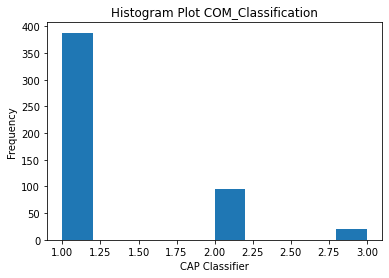

In [41]:
#plotting distribution
plt.hist(data_stack['COM_Classification'],bins = 'auto')
# Add axis labels
plt.xlabel("CAP Classifier")
plt.ylabel("Frequency")
plt.title("Histogram Plot COM_Classification")
#plotting mean value as red line
plt.show()

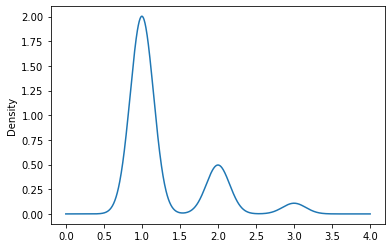

In [44]:
#Density plot for data_stack['COM_Classification']

densityC = data_stack['COM_Classification'].plot.kde()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


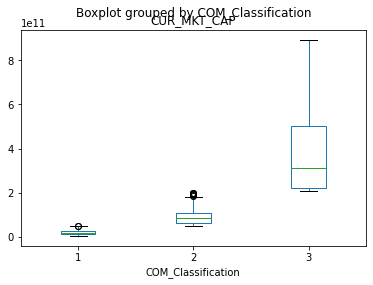

In [47]:
data_stack.boxplot(by ='COM_Classification', column =['CUR_MKT_CAP'], grid = False)

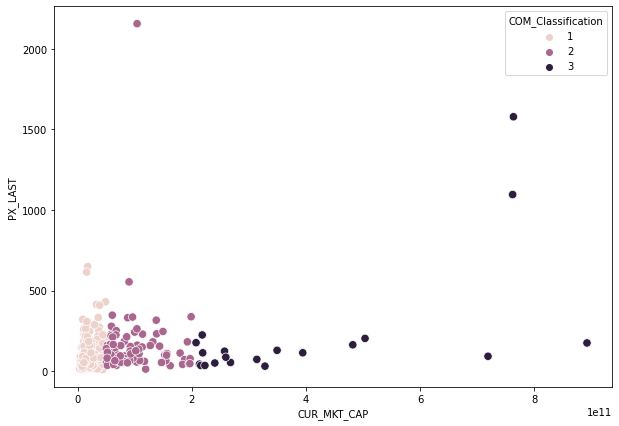

In [51]:
#data.plot.scatter(x = 'CUR_MKT_CAP', y = 'PX_LAST')
plt.figure(figsize=(10,7))
sns.scatterplot(x = 'CUR_MKT_CAP', y = 'PX_LAST', s = 70, hue ='COM_Classification', data=data_stack);

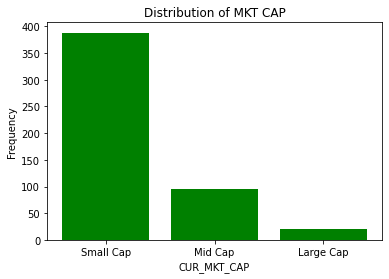

In [52]:
#plotting different classes with thier count
record_dict = {"Small Cap":small_cap_n,'Mid Cap':mid_cap_n,'Large Cap':large_cap_n}
# Add axis labels
plt.xlabel("CUR_MKT_CAP")
plt.ylabel("Frequency")
plt.title("Distribution of MKT CAP")
plt.bar(record_dict.keys(), record_dict.values(), color='g')
plt.show()